In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import cv2 as cv
from google.colab import files

# Data Processing & Normalization

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


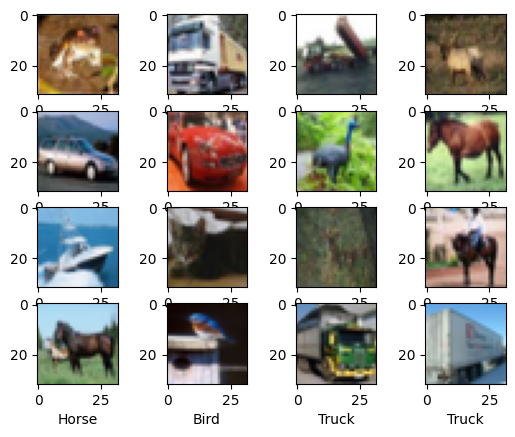

In [3]:
training_images, testing_images = training_images/255, testing_images/255

class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.xticks()
  plt.yticks()
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [4]:
training_images = training_images[:50000]
training_labels = training_labels[:50000]
testing_images = testing_images[:5000]
testing_labels = testing_labels[:5000]

# Building the Model

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, validation_data=(testing_images, testing_labels))

Epoch 1/20
1563/1563 [==============================] - 66s 40ms/step - loss: 1.5243 - accuracy: 0.4458 - val_loss: 1.2326 - val_accuracy: 0.5642
Epoch 2/20
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1546 - accuracy: 0.5893 - val_loss: 1.0723 - val_accuracy: 0.6300
Epoch 3/20
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0048 - accuracy: 0.6480 - val_loss: 0.9985 - val_accuracy: 0.6586
Epoch 4/20
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9082 - accuracy: 0.6831 - val_loss: 0.9293 - val_accuracy: 0.6804
Epoch 5/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8343 - accuracy: 0.7076 - val_loss: 0.9269 - val_accuracy: 0.6784
Epoch 6/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7818 - accuracy: 0.7238 - val_loss: 0.9091 - val_accuracy: 0.6852
Epoch 7/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7282 - accuracy: 0.7435 - val_loss: 0.8754 -

In [6]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')

157/157 [==============================] - 2s 11ms/step - loss: 1.2110 - accuracy: 0.6972
Loss: 1.2109875679016113, Accuracy: 0.6972000002861023


In [7]:
# Let's save the model, so we can use it later
model.save('cifar10-image-classification-model')

# Try the Model

Saving Emirates_plane.jpg to Emirates_plane.jpg
1/1 [==============================] - 0s 141ms/step
The Prediction is Plane


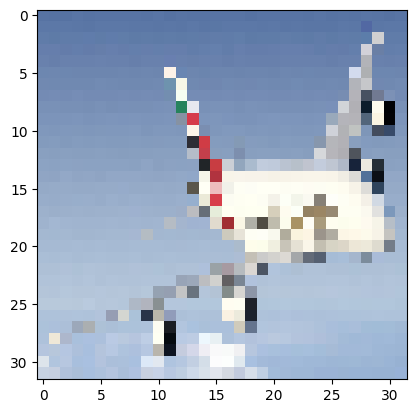

In [9]:
# Load the saved Model
model = models.load_model('cifar10-image-classification-model')

# Let's Try the model
uploaded = files.upload()

for fn in uploaded.keys():

  img = cv.imread(fn)
  img = cv.resize(img, (32, 32))
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

  plt.imshow(img, cmap=plt.cm.binary)

  pred = model.predict(np.array([img]) / 255)
  index = np.argmax(pred)
  print(f"The Prediction is {class_names[index]}")

  plt.show()